# neuroComBat para medidas espectrales
El código fuente está disponible acá:  https://github.com/Warvito/neurocombat_sklearn


In [ ]:
!pip install neurocombat-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from neurocombat_sklearn import CombatModel
import numpy as np

# Loading data
df = pd.read_csv('/content/dominant_frequency_and_variability.csv')
df.head()

,center,subject,channel,epoch,df_ep,dfv_ch,group,age,gender
0,medellin,m-1,FC1,0,10.5,0.0,hc,65,m
1,medellin,m-1,FC1,1,11.5,1.0,hc,65,m
2,medellin,m-1,FC1,2,3.5,8.0,hc,65,m
3,medellin,m-1,FC1,3,12.5,9.0,hc,65,m
4,medellin,m-1,FC1,4,5.0,7.5,hc,65,m


In [ ]:
df.describe()

,epoch,df_ep,dfv_ch,age
count,82331.000000,82331.000000,82331.000000,82331.000000
mean,8.000000,8.864705,1.508460,65.784431
std,4.899009,2.431809,1.969642,8.148463
min,0.000000,3.000000,0.000000,46.000000
25%,4.000000,7.500000,0.000000,60.000000
50%,8.000000,9.000000,0.500000,66.000000
75%,12.000000,10.000000,2.000000,71.000000
max,16.000000,17.000000,13.000000,86.000000


In [ ]:
le_center = LabelEncoder()
le_center.fit(df['center'])
print(list(le_center.classes_))

le_gender = LabelEncoder()
le_gender.fit(df['gender'])
print(list(le_gender.classes_))

le_channel = LabelEncoder()
le_channel.fit(df['channel'])
print(list(le_channel.classes_))


['california', 'finland', 'iowa', 'medellin']
['f', 'm']
['AF3', 'AF4', 'C3', 'C4', 'CP1', 'CP2', 'CP5', 'CP6', 'Cz', 'F3', 'F4', 'F7', 'F8', 'FC1', 'FC2', 'FC5', 'FC6', 'Fp1', 'Fp2', 'Fz', 'O1', 'O2', 'Oz', 'P3', 'P4', 'P7', 'P8', 'T7', 'T8']


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['center', 'channel', 'gender']
le = LabelEncoder()
# Encode labels of multiple columns at once
df[cols] = df[cols].apply(le.fit_transform)

df.head()

,center,subject,channel,epoch,df_ep,dfv_ch,group,age,gender
0,3,m-1,13,0,10.5,0.0,hc,65,1
1,3,m-1,13,1,11.5,1.0,hc,65,1
2,3,m-1,13,2,3.5,8.0,hc,65,1
3,3,m-1,13,3,12.5,9.0,hc,65,1
4,3,m-1,13,4,5.0,7.5,hc,65,1


In [ ]:
# Creating a df by population group
df_hc = df[df.group == 'hc']
df_pd = df[df.group == 'pd']

In [ ]:
# Creating ComBat model
cb_model = CombatModel()

# Fitting model
cb_model.fit(df_hc[['df_ep', 'dfv_ch']].to_numpy(),
             df_hc[['center']],
             df_hc[['channel']],
             df_hc[['epoch']])

# Harmonize data over hc group
data_combat = cb_model.transform(df_hc[['df_ep', 'dfv_ch']].to_numpy(),
                                 df_hc[['center']],
                                 df_hc[['channel']],
                                 df_hc[['epoch']])

df_hc['df_ep_harmonized'] = data_combat[:,0]
df_hc['dfv_ch_harmonized'] = data_combat[:,1]



# Harmonize data over pd group
data_combat_pd = cb_model.transform(df_pd[['df_ep', 'dfv_ch']].to_numpy(),
                                 df_pd[['center']],
                                 df_pd[['channel']],
                                 df_pd[['epoch']])

df_pd['df_ep_harmonized'] = data_combat_pd[:,0]
df_pd['dfv_ch_harmonized'] = data_combat_pd[:,1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
df_hc.head(100)

,center,subject,channel,epoch,df_ep,dfv_ch,group,age,gender,pca-one,pca-two,tsne-one,tsne-two,df_ep_harmonized,dfv_ch_harmonized,harmonized-tsne-one,harmonized-tsne-two
0,3,m-1,13,0,10.5,0.0,hc,65,1,0.970978,-8.044075,-37.207733,9.020421,10.142698,0.199490,-14.771473,-59.223370
1,3,m-1,13,1,11.5,1.0,hc,65,1,0.970846,-7.010348,-37.266506,11.407514,11.341120,1.339127,-12.257968,-59.487930
2,3,m-1,13,2,3.5,8.0,hc,65,1,1.112504,-5.815159,-13.242469,21.089930,1.749969,9.338464,8.972557,-19.221039
3,3,m-1,13,3,12.5,9.0,hc,65,1,1.035967,-4.758040,-2.161108,1.841947,12.539122,10.478101,-1.507590,-23.890791
4,3,m-1,13,4,5.0,7.5,hc,65,1,1.093751,-3.827410,10.113003,6.918216,3.547392,8.759529,8.566980,-18.425028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,m-1,10,10,5.5,6.0,hc,65,1,4.075429,2.123012,14.901550,9.798311,4.148523,6.999725,7.360899,-13.778083
96,3,m-1,10,11,12.5,7.0,hc,65,1,4.017993,3.174284,25.255360,27.463463,12.539993,8.139362,36.327850,10.289261
97,3,m-1,10,12,13.0,0.5,hc,65,1,3.952844,3.971824,47.727581,9.785861,13.138994,0.704374,31.731340,9.382917
98,3,m-1,10,13,14.0,1.0,hc,65,1,3.948059,4.989902,48.025547,9.621787,14.337415,1.272369,31.809221,9.462486


In [ ]:
df_pd.head(100)

,center,subject,channel,epoch,df_ep,dfv_ch,group,age,gender,df_ep_harmonized,dfv_ch_harmonized
17255,3,m-37,13,0,9.5,0.0,pd,67,1,8.943857,0.199490
17256,3,m-37,13,1,11.0,1.5,pd,67,1,10.741699,1.910768
17257,3,m-37,13,2,11.0,0.0,pd,67,1,10.741279,0.192197
17258,3,m-37,13,3,12.0,1.0,pd,67,1,11.939701,1.331834
17259,3,m-37,13,4,14.5,2.5,pd,67,1,14.936385,3.043112
...,...,...,...,...,...,...,...,...,...,...,...
17350,3,m-37,10,10,5.0,4.0,pd,67,1,3.549102,4.713158
17351,3,m-37,10,11,9.0,4.0,pd,67,1,8.344048,4.709512
17352,3,m-37,10,12,10.0,1.0,pd,67,1,9.542470,1.276015
17353,3,m-37,10,13,16.0,6.0,pd,67,1,16.735098,6.988786


In [ ]:
df_hc.to_csv('dominant_frequency_and_variability_hc.csv', index=False)
df_pd.to_csv('dominant_frequency_and_variability_pd.csv', index=False)

#HC Group

Text(0.5, 1.0, 'dfv_ch')

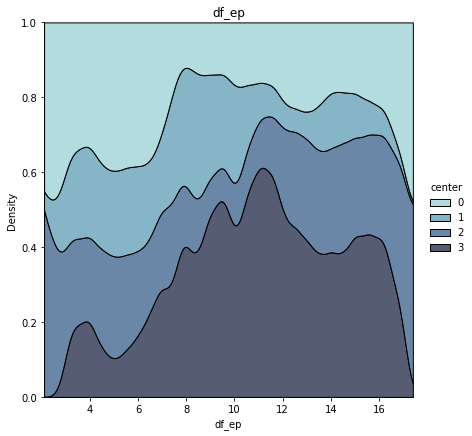

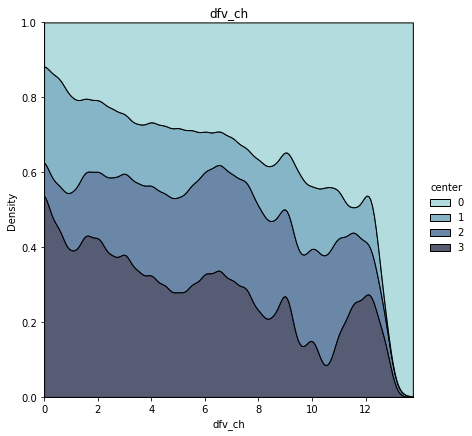

In [ ]:
sns.displot(
    data=df_hc[['center',	'channel', 'epoch', 'df_ep', 'dfv_ch']],
    hue="center",
    x="df_ep",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('df_ep')


sns.displot(
    data=df_hc[['center',	'channel', 'epoch', 'df_ep', 'dfv_ch']],
    hue="center",
    x="dfv_ch",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75"
    )
plt.title('dfv_ch')


Text(0.5, 1.0, 'dfv_ch_harmonized')

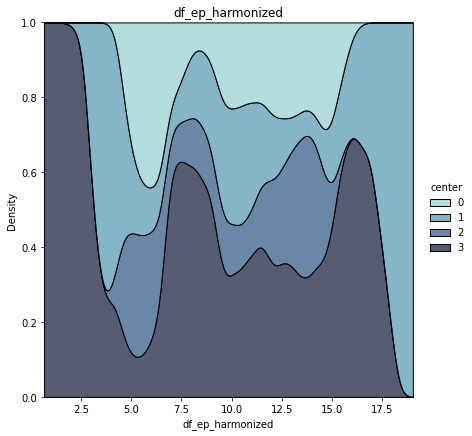

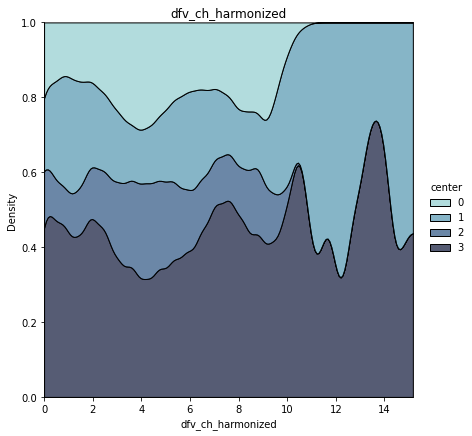

In [ ]:
sns.displot(
    data=df_hc[['center',	'channel', 'epoch', 'df_ep_harmonized', 'dfv_ch_harmonized']],
    hue="center",
    x="df_ep_harmonized",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75"
    )
plt.title('df_ep_harmonized')

sns.displot(
    data=df_hc[['center',	'channel', 'epoch', 'df_ep_harmonized', 'dfv_ch_harmonized']],
    hue="center",
    x="dfv_ch_harmonized",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75"
    )
plt.title('dfv_ch_harmonized')


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df_hc[['center',	'channel', 'epoch', 'df_ep', 'dfv_ch']].values)

df_hc['tsne-one'] = tsne_result[:,0]
df_hc['tsne-two'] = tsne_result[:,1] 

tsne = TSNE(n_components=2)
harmonized_tsne_result = tsne.fit_transform(df_hc[['center',	'channel', 'epoch', 'df_ep_harmonized', 'dfv_ch_harmonized']].values)

df_hc['harmonized-tsne-one'] = harmonized_tsne_result[:,0]
df_hc['harmonized-tsne-two'] = harmonized_tsne_result[:,1] 

In [ ]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df_hc[['center',	'channel', 'epoch', 'df_ep', 'dfv_ch']].values)

df_hc['tsne-one'] = tsne_result[:,0]
df_hc['tsne-two'] = tsne_result[:,1] 

tsne = TSNE(n_components=2)
harmonized_tsne_result = tsne.fit_transform(df_hc[['center',	'channel', 'epoch', 'df_ep_harmonized', 'dfv_ch_harmonized']].values)

df_hc['harmonized-tsne-one'] = harmonized_tsne_result[:,0]
df_hc['harmonized-tsne-two'] = harmonized_tsne_result[:,1] 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

Text(0.5, 1.0, 'raw')

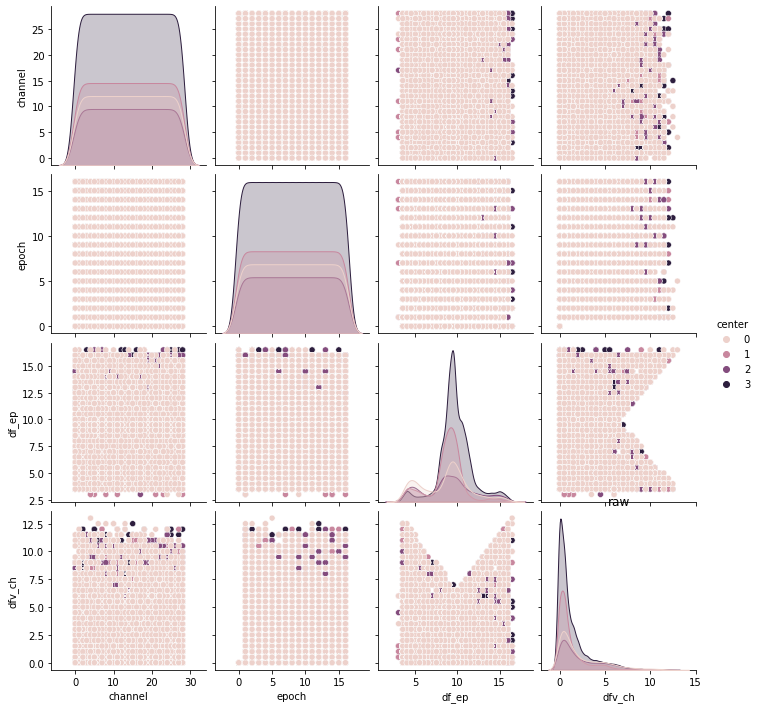

In [ ]:
sns.pairplot(df_hc[['center',	'channel', 'epoch', 'df_ep', 'dfv_ch']], hue="center", kind='scatter')
plt.title('raw')


Text(0.5, 1.0, 'raw')

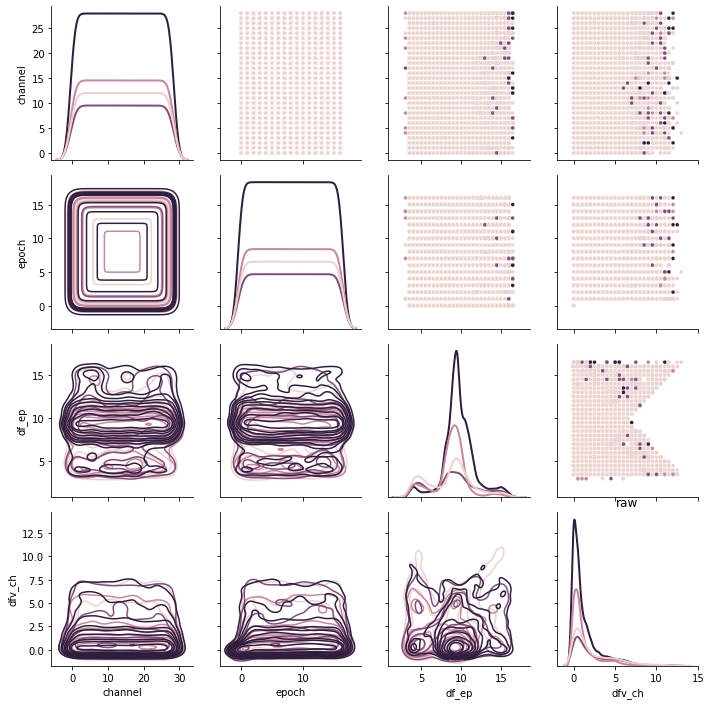

In [ ]:
g = sns.PairGrid(df_hc[['center',	'channel', 'epoch', 'df_ep', 'dfv_ch']], hue="center", diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.title('raw')


Text(0.5, 1.0, 'tsne raw distribution')

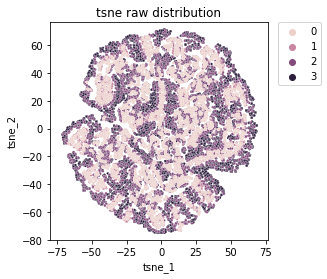

In [ ]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': df_hc['center'] })
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=5)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title('tsne raw distribution')


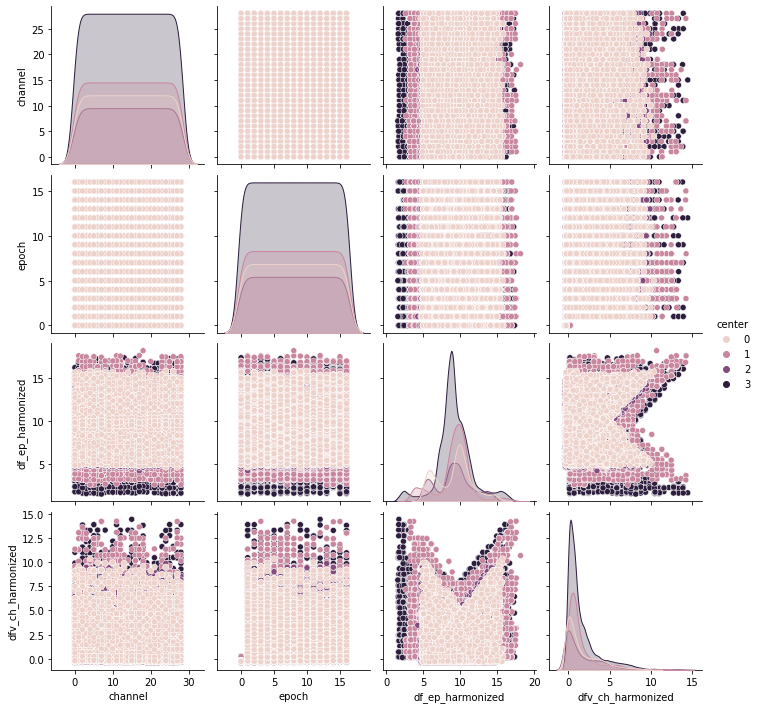

In [ ]:
sns.pairplot(df_hc[['center',	'channel', 'epoch', 'df_ep_harmonized', 'dfv_ch_harmonized']], hue="center", kind='scatter')
plt.title('harmonized')

Text(0.5, 1.0, 'harmonized')

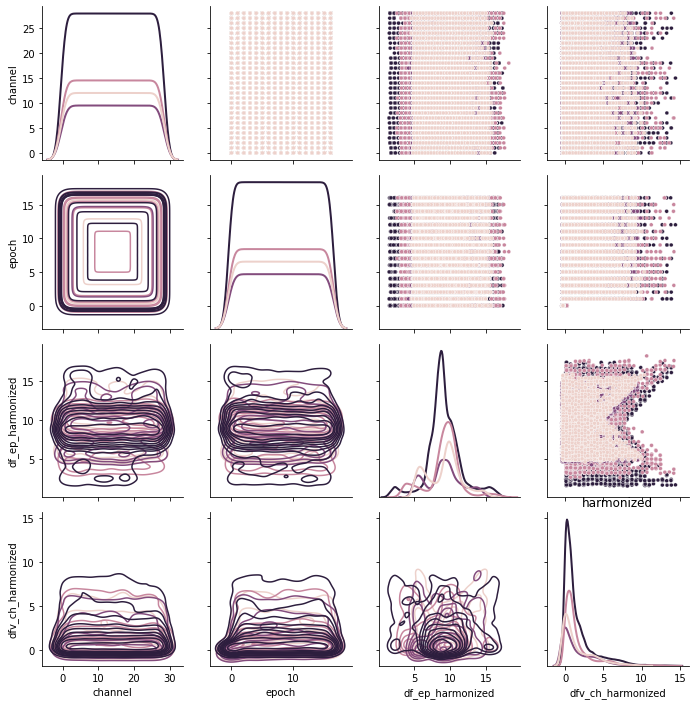

In [ ]:
g = sns.PairGrid(df_hc[['center',	'channel', 'epoch', 'df_ep_harmonized', 'dfv_ch_harmonized']], hue="center", diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)
plt.title('harmonized')


Text(0.5, 1.0, 'tsne harmonized distribution')

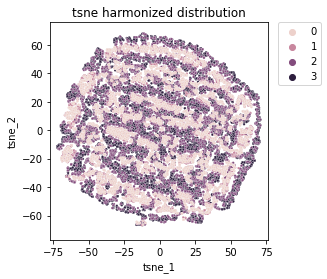

In [ ]:
harmonized_tsne_result_df = pd.DataFrame({'tsne_1': harmonized_tsne_result[:,0], 'tsne_2': harmonized_tsne_result[:,1], 'label': df_hc['center'] })
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=harmonized_tsne_result_df, ax=ax, s=5)
lim = (harmonized_tsne_result.min()-5, harmonized_tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.title('tsne harmonized distribution')


In [ ]:
tsne_3 = TSNE(n_components=3)
harmonized_tsne_result_3 = tsne_3.fit_transform(df_hc[['center',	'channel', 'epoch', 'df_ep_harmonized', 'dfv_ch_harmonized']].values)

df_hc['harmonized-tsne3-one'] = harmonized_tsne_result_3[:,0]
df_hc['harmonized-tsne3-two'] = harmonized_tsne_result_3[:,1] 
df_hc['harmonized-tsne3-three'] = harmonized_tsne_result_3[:,2] 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


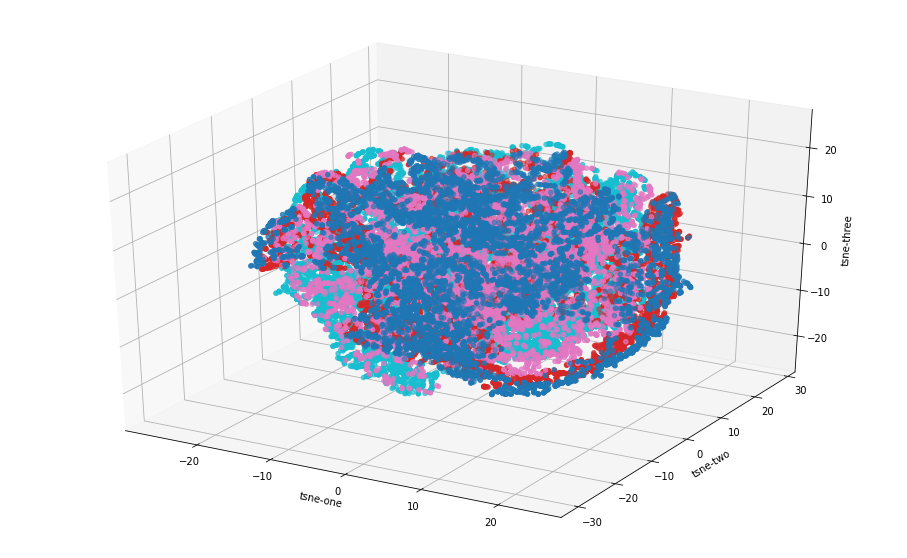

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_hc['harmonized-tsne3-one'], 
    ys=df_hc['harmonized-tsne3-two'], 
    zs=df_hc['harmonized-tsne3-three'], 
    c=df_hc['center'], 
    cmap='tab10'
)
ax.set_xlabel('tsne-one')
ax.set_ylabel('tsne-two')
ax.set_zlabel('tsne-three')
plt.show()

# ComBat example

Ejemplo de la librería neurocombat a partir de un dataframe de pandas

In [ ]:
!wget https://github.com/Warvito/neurocombat_sklearn/blob/master/examples/data/bladder-pheno.txt bladder-pheno 
!wget https://github.com/Warvito/neurocombat_sklearn/blob/master/examples/data/bladder-expr.npy bladder-expr

--2022-09-04 19:09:52--  https://github.com/Warvito/neurocombat_sklearn/blob/master/examples/data/bladder-pheno.txt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘bladder-pheno.txt.1’

bladder-pheno.txt.1     [ <=>                ] 149.35K  --.-KB/s    in 0.01s   

2022-09-04 19:09:52 (13.9 MB/s) - ‘bladder-pheno.txt.1’ saved [152939]

--2022-09-04 19:09:52--  http://bladder-pheno/
Resolving bladder-pheno (bladder-pheno)... failed: Name or service not known.
wget: unable to resolve host address ‘bladder-pheno’
FINISHED --2022-09-04 19:09:52--
Total wall clock time: 0.2s
Downloaded: 1 files, 149K in 0.01s (13.9 MB/s)
--2022-09-04 19:09:52--  https://github.com/Warvito/neurocombat_sklearn/blob/master/examples/data/bladder-expr.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.11

In [ ]:
"""
=====================================================================
Test2
=====================================================================
"""
print(__doc__)

from neurocombat_sklearn import CombatModel
import pandas as pd
import numpy as np

# Loading data
data = np.load('/content/bladder-expr.npy') ## este data y el de abajo están acá https://github.com/Warvito/neurocombat_sklearn/tree/master/examples/data
covars = pd.read_csv('/content/bladder-pheno.txt', delimiter='\t')

# Creating model
model = CombatModel()

# Fitting model
# make sure that your inputs are 2D, e.g. shape [n_samples, n_discrete_covariates]
model.fit(data,
          covars[['batch']],
          covars[['cancer']],
          covars[['age']])

# Harmonize data
# could be performed together with fitt by using .fit_transform method
data_combat = model.transform(data,
                              covars[['batch']],
                              covars[['cancer']],
                              covars[['age']])


Test2



In [ ]:
print(data[0])
print(data[1])

[10.11516989  5.34516843  6.34802438 ...  3.31955381  3.63727718
  3.47539714]
[8.62804433 5.06359834 6.66362482 ... 3.47753857 3.90971085 3.71086001]


In [ ]:
print(data_combat[0])
print(data_combat[1])

[9.14820812 5.35800456 6.6654057  ... 3.38082398 3.71319766 3.50200692]
[8.51528801 5.12694945 6.42528023 ... 3.39809961 3.848926   3.58605696]


En el archivo csv (ESTÁ SEPARADO POR COMAS) que te mandé con los datos están:

1. "batch" que sería en el CSV la columna "center" y tiene cuatro niveles (medellin,iowa,california,finland).
2. como covariables estarían "age" (ya es numérica), "channel", "gender"  (f/m) y "group" (hc/pd). Donde el grupo es PD=Parkinson y HC=Controles.
3. La feature que voy a normalizar "data" está en la columna "df_ep". Y acá es donde me enredo, porque es una sola columna pero acuérdate que cada fila no es un individuo, sino que cada fila del csv tiene el valor de la feature en el canal 1 y la época 0, y sigue fila a fila, hasta el final de las épocas (16) y ya luego pasa al canal 2 en la fila que sigue. Entonces ahí me recontra enredo más con las shapes de esos datos T_T 


4. el orden de los canales ES EL MISMO en TODOS los centros (batches). No sé si eso te podría ayudar a la hora de hacer el reshape pero creo que sí.

# NOTA: Yo sé que los datos en ComBat deben estar normalizados. Y esa métrica de df_ep no se deja normalizar fácilmente, si por algún motivo pone problema en la convergencia del combat, se podría intentar con este otro archivo que tiene datos de potencia relativa en una banda (5.5 - < 8 Hz) y es idéntico al CSV inicial que te mandé pero con "prealpha_log" como feature en lugar de "df_ep". Esa potencia sí tiene distribuciones más cercanas a la normal (ver imágenes abajo), también está la columna "pre_alpha" en caso de que sea mejor meter los datos sin log-transformar. Lo puedes DESCARGAR ACÁ: https://drive.google.com/file/d/16rP42F92iMPkCPGjhKZDrJIWsaEuT_Sk/view?usp=sharing  

pre_alpha SIN normalizar log 10

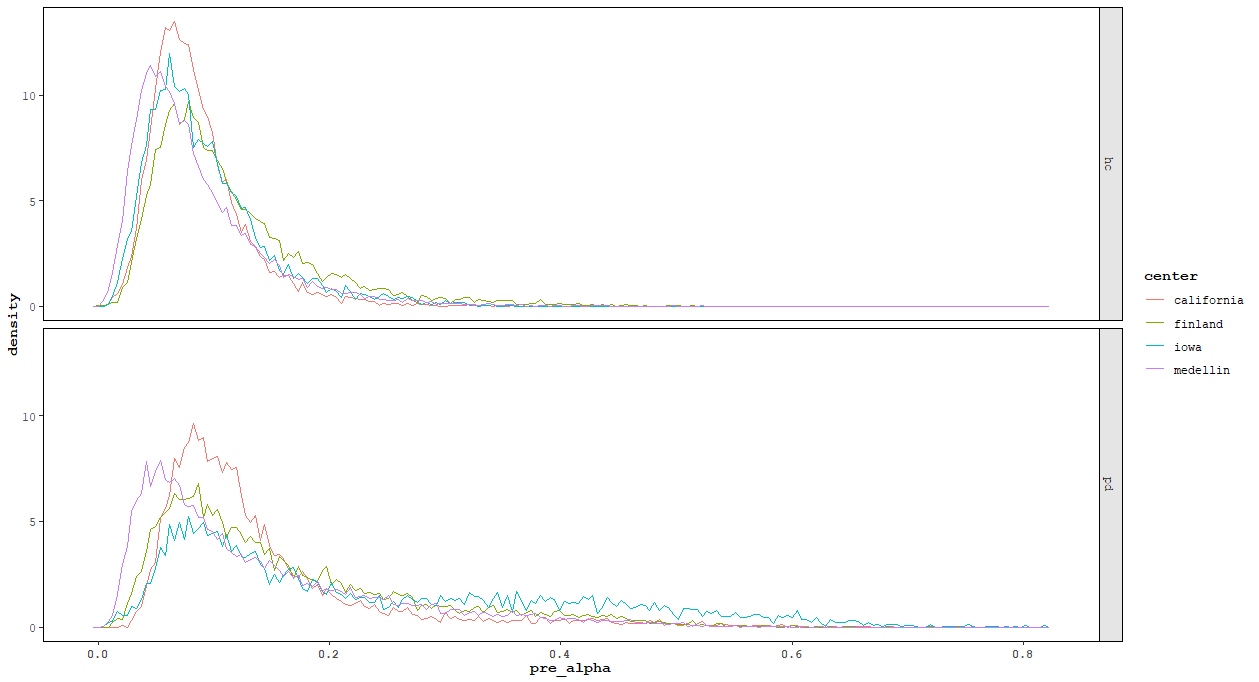

prealpha_log YA NORMALIZADA

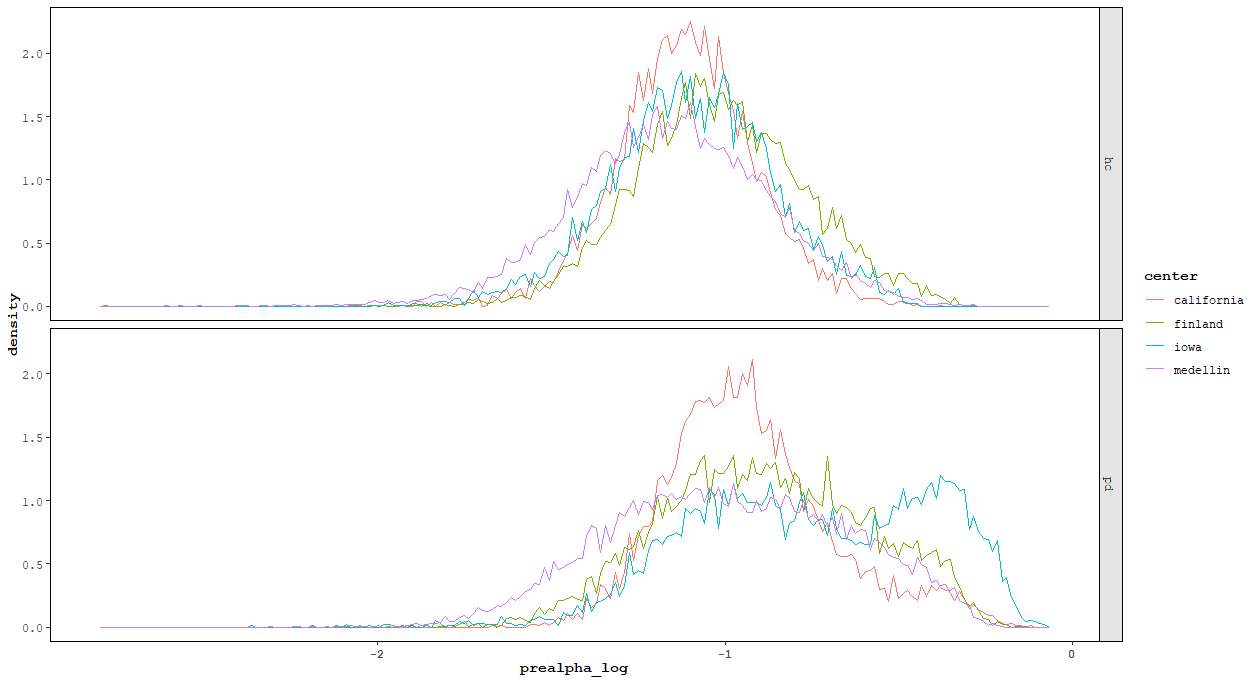